### Step 1: Import Libraries

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

### Step 2: Load the CSV as a Pandas Dataframe

In [116]:
df = pd.read_csv('Caravan.csv')
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


### Factorize the 'Purchase' column
### Shuffles your dataframe in-place and resets the index

In [117]:
df = pd.read_csv('Caravan.csv', index_col = False)

df['Purchase'] = df.Purchase.factorize()[0]

df = df.sample(frac=1).reset_index(drop=True)
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,38,1,2,3,9,0,6,0,3,7,...,0,0,0,0,0,0,0,0,0,0
1,24,2,2,2,5,1,3,2,4,2,...,0,0,0,1,0,0,0,0,0,0
2,3,1,2,4,1,0,5,0,4,7,...,1,0,0,0,0,0,0,0,0,0
3,3,1,2,4,1,0,5,0,4,7,...,0,0,0,1,0,0,0,0,0,0
4,23,1,2,3,5,0,6,1,2,6,...,0,0,0,1,0,0,0,0,0,0


In [118]:
# Check whether the data has NaN values
df.isnull().sum().describe()
# The data is complete

count    86.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

In [119]:
df.describe()
#df.corr()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


#### 5.9% have purchased the insurance
#### Wide range of values of values are seen.
#### Some are classifier variables, AGEZONG, APERSONG, ABRAND etc. Within them, they maybe two variables, or three, four or seven.

In [75]:
c = df.corr().abs()
#type(c)
s = c.unstack()
so = s.sort_values(kind="quicksort")
so.shape[0]
np.sqrt(so.shape[0])


86.0

### Correlations vs Number of Occurences

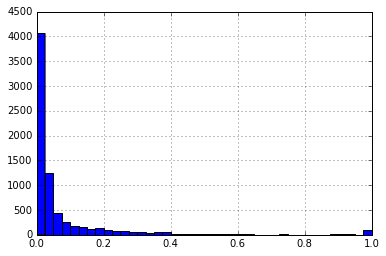

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline

so.hist(bins=40,normed=False,label = 'Correlations vs Number of Occurences')



In [122]:
y = df.Purchase

X = df.drop(['Purchase'], axis=1).values

### Split the data into train, test and validate

In [185]:

from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

seed = 8
test_size = 0.4
Cs = np.logspace(-3, 4, 8)
parameters = {'C': [0.001, 0.01,0.1, 0.5, 1]}

# Whole into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

X_train.shape[0]
y_train.shape[0]

y_test.describe()

count    2329.000000
mean        0.056247
std         0.230448
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Purchase, dtype: float64

In [187]:
# Import SK Learn Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from sklearn.linear_model import LogisticRegression

### GridSearchCV Cross-Validation with KNN 

In [194]:
knn = KNeighborsClassifier(n_neighbors = 1, p = 2)
knn.fit(X_train,y_train)
y_hat = knn.predict(X_test)

print(confusion_matrix(y_test, y_hat))
print(accuracy_score(y_test, y_hat) )

acc = []
best_score = 0.0
for k in range(1,20, 1):
    clf = KNeighborsClassifier(k)
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    score = accuracy_score(y_test, y_hat )
    
    acc.append(score)
    print("k: %s accuracy: %0.2f missed %s"% (k, score, np.count_nonzero(y_hat - y_test))   )
    if (score > best_score):
        best_score = score
        print ("Best k: %s and score: %0.2f"% (k, best_score)    )
        print (confusion_matrix(y_test, y_hat))
    




[[2191    7]
 [ 128    3]]
0.942035208244
[[2091  107]
 [ 118   13]]
0.90339201374
k: 1 accuracy: 0.90 missed 225
Best k: 1 and score: 0.90
[[2091  107]
 [ 118   13]]
k: 2 accuracy: 0.94 missed 137
Best k: 2 and score: 0.94
[[2190    8]
 [ 129    2]]
k: 3 accuracy: 0.94 missed 148
k: 4 accuracy: 0.94 missed 135
Best k: 4 and score: 0.94
[[2193    5]
 [ 130    1]]
k: 5 accuracy: 0.94 missed 141
k: 6 accuracy: 0.94 missed 132
Best k: 6 and score: 0.94
[[2197    1]
 [ 131    0]]
k: 7 accuracy: 0.94 missed 133
k: 8 accuracy: 0.94 missed 132
k: 9 accuracy: 0.94 missed 134
k: 10 accuracy: 0.94 missed 133
k: 11 accuracy: 0.94 missed 133
k: 12 accuracy: 0.94 missed 131
Best k: 12 and score: 0.94
[[2198    0]
 [ 131    0]]
k: 13 accuracy: 0.94 missed 132
k: 14 accuracy: 0.94 missed 131
k: 15 accuracy: 0.94 missed 131
k: 16 accuracy: 0.94 missed 131
k: 17 accuracy: 0.94 missed 131
k: 18 accuracy: 0.94 missed 131
k: 19 accuracy: 0.94 missed 131


### Logistic Regression - SImple

In [323]:
clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train,y_train)
y_hat = clf.predict(X_test)

print(confusion_matrix(y_test, y_hat))
print(accuracy_score(y_test, y_hat) )




[[2191    7]
 [ 128    3]]
0.942035208244


### GridSearchCV and Logistic Regression with CV=5 with ROC scoring

In [319]:
parameters = {'C': [0.001, 0.01,0.1, 0.5, 1]}
lr = LogisticRegression()
lr_roc_clf = GridSearchCV(lr, parameters, cv=5, scoring='roc_auc')
lr_roc_clf.fit(X_train,y_train)
best_clf = lr_roc_clf.best_estimator_
#print (best_clf)
print (lr_roc_clf.grid_scores_)
print (lr_roc_clf.best_params_)
print (lr_roc_clf.best_score_)

y_hat = best_clf.predict(X_test)
print( accuracy_score(y_hat,y_test))
print( confusion_matrix(y_hat,y_test))
print( classification_report(y_hat,y_test))


[mean: 0.69162, std: 0.02772, params: {'C': 0.001}, mean: 0.71821, std: 0.01933, params: {'C': 0.01}, mean: 0.71637, std: 0.02163, params: {'C': 0.1}, mean: 0.70742, std: 0.02718, params: {'C': 0.5}, mean: 0.70417, std: 0.02969, params: {'C': 1}]
{'C': 0.01}
0.718209211937
0.943752683555
[[2198  131]
 [   0    0]]
             precision    recall  f1-score   support

          0       1.00      0.94      0.97      2329
          1       0.00      0.00      0.00         0

avg / total       1.00      0.94      0.97      2329



/Users/thomas/anaconda2/envs/gads/lib/python3.5/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### GridSearchCV and Logistic Regression with CV=5 with Accuracy scoring

In [161]:
lr = LogisticRegression()
lr_acc_clf = GridSearchCV(lr, parameters, cv=5, scoring='accuracy')
lr_acc_clf.fit(X_train,y_train)

best_clf = lr_acc_clf.best_estimator_
#print (best_clf)
print (lr_roc_clf.grid_scores_)
print (lr_roc_clf.best_params_)
print (lr_roc_clf.best_score_)

y_hat = best_clf.predict(X_test)
print( accuracy_score(y_hat,y_test))
print( confusion_matrix(y_hat,y_test))
print( classification_report(y_hat,y_test))

[mean: 0.69653, std: 0.02573, params: {'C': 0.001}, mean: 0.71762, std: 0.01590, params: {'C': 0.01}, mean: 0.71409, std: 0.01575, params: {'C': 0.1}, mean: 0.70692, std: 0.01400, params: {'C': 0.5}, mean: 0.70330, std: 0.01242, params: {'C': 1}]
{'C': 0.01}
0.717624326121
0.93991416309
[[1095   70]
 [   0    0]]
             precision    recall  f1-score   support

          0       1.00      0.94      0.97      1165
          1       0.00      0.00      0.00         0

avg / total       1.00      0.94      0.97      1165



/Users/thomas/anaconda2/envs/gads/lib/python3.5/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [207]:
#GridSearchCV and KNN = 1,2,5,10
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [10] }
#cv = {'cv': [1,2,5,10] }
knn_clf = GridSearchCV(knn, parameters, cv=10,scoring='log_loss')
knn_clf.fit(X_train, y_train)
best_clf = knn_clf.best_estimator_
#print (best_clf)
#knn_y_hat = knn_clf.predict_proba(X_test)
print (knn_clf.grid_scores_)
print (knn_clf.best_params_)
print (knn_clf.best_score_)

y_hat = best_clf.predict(X_test)
print( accuracy_score(y_hat,y_test))
print( confusion_matrix(y_hat,y_test))
print( classification_report(y_hat,y_test))


[mean: -0.95932, std: 0.17087, params: {'n_neighbors': 10}]
{'n_neighbors': 10}
-0.959316935467
0.9428939459
[[2196  131]
 [   2    0]]
             precision    recall  f1-score   support

          0       1.00      0.94      0.97      2327
          1       0.00      0.00      0.00         2

avg / total       1.00      0.94      0.97      2329



### Changing CV from 5 to 10 has not improved the scores
### Get your scoring matrix something on the lines
### Expected Value = (Postive_Value)*Number_of_yes + (Negative_Value)*Number_of_nos

### Plotting for best ROC AUCs for LR and KNN

/Users/thomas/anaconda2/envs/gads/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/thomas/anaconda2/envs/gads/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/thomas/anaconda2/envs/gads/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/thomas/anaconda2/envs/gads/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/thomas/anaconda2/envs/gads/lib/python3.5/site-packages/sklearn/linear

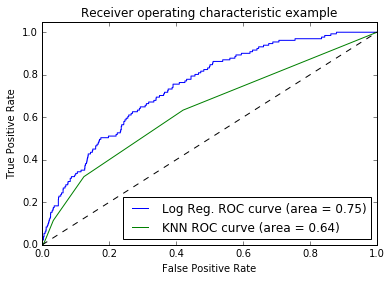

In [250]:
# LR:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

lr = LogisticRegression()
parameters = {'solver': ['newton-cg','lbfgs','liblinear','sag']}
clf = GridSearchCV(lr, parameters, cv = 5)
clf.fit(X_train, y_train)
best_clf = clf.best_estimator_
y_hat_proba = best_clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_hat_proba[:,1])
roc_auc = auc(fpr, tpr)

# KNN:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [10] }
#cv = {'cv': [1,2,5,10] }
knn_clf = GridSearchCV(knn, parameters, cv=10,scoring='log_loss')
knn_clf.fit(X_train, y_train)
knn_y_hat = knn_clf.predict_proba(X_test)

knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_y_hat[:,1])
knn_roc_auc = auc(knn_fpr, knn_tpr)

plt.figure()
plt.plot(fpr, tpr, label='Log Reg. ROC curve (area = %0.2f)' % roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Does normalizing help?

In [211]:

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

# Scale and Transform
XX = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split( XX, y, test_size=test_size, random_state=seed)




/Users/thomas/anaconda2/envs/gads/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/thomas/anaconda2/envs/gads/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Normalized Data - GridSearchCV and Logistic Regression with CV=5 with ROC scoring

In [215]:
parameters = {'C': [0.00001, 0.001, 0.01,0.1, 0.5, 1]}
lr = LogisticRegression()
lr_roc_clf = GridSearchCV(lr, parameters, cv=5, scoring='roc_auc')
lr_roc_clf.fit(X_train,y_train)
best_clf = lr_roc_clf.best_estimator_
#print (best_clf)
print (lr_roc_clf.grid_scores_)
print (lr_roc_clf.best_params_)
print (lr_roc_clf.best_score_)

y_hat = best_clf.predict(X_test)
print( accuracy_score(y_hat,y_test))
print( confusion_matrix(y_hat,y_test))
print( classification_report(y_hat,y_test))

[mean: 0.70411, std: 0.03337, params: {'C': 1e-05}, mean: 0.72791, std: 0.03012, params: {'C': 0.001}, mean: 0.72594, std: 0.02863, params: {'C': 0.01}, mean: 0.71407, std: 0.03067, params: {'C': 0.1}, mean: 0.70256, std: 0.03200, params: {'C': 0.5}, mean: 0.69765, std: 0.03218, params: {'C': 1}]
{'C': 0.001}
0.727913525531
0.941605839416
[[2190  128]
 [   8    3]]
             precision    recall  f1-score   support

          0       1.00      0.94      0.97      2318
          1       0.02      0.27      0.04        11

avg / total       0.99      0.94      0.97      2329



### Normalized Data - GridSearchCV and KNN = 2

In [220]:

knn = KNeighborsClassifier()
parameters = {'n_neighbors': [2] }
#cv = {'cv': [1,2,5,10] }
knn_clf = GridSearchCV(knn, parameters, cv=2,scoring='roc_auc')
knn_clf.fit(X_train, y_train)
best_clf = knn_clf.best_estimator_
#print (best_clf)
#knn_y_hat = knn_clf.predict_proba(X_test)
print (knn_clf.grid_scores_)
print (knn_clf.best_params_)
print (knn_clf.best_score_)

y_hat = best_clf.predict(X_test)
print( accuracy_score(y_hat,y_test))
print( confusion_matrix(y_hat,y_test))
print( classification_report(y_hat,y_test))



[mean: -1.96365, std: 0.08132, params: {'n_neighbors': 2}]
{'n_neighbors': 2}
-1.96365144813
0.937741519966
[[2181  128]
 [  17    3]]
             precision    recall  f1-score   support

          0       0.99      0.94      0.97      2309
          1       0.02      0.15      0.04        20

avg / total       0.98      0.94      0.96      2329



/Users/thomas/anaconda2/envs/gads/lib/python3.5/site-packages/ipykernel/__main__.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/thomas/anaconda2/envs/gads/lib/python3.5/site-packages/matplotlib/legend.py:325: UserWarning: Unrecognized location "Best". Falling back on "best"; valid locations are
	upper left
	upper center
	upper right
	best
	right
	center
	lower left
	lower center
	center left
	center right
	lower right

  six.iterkeys(self.codes))))


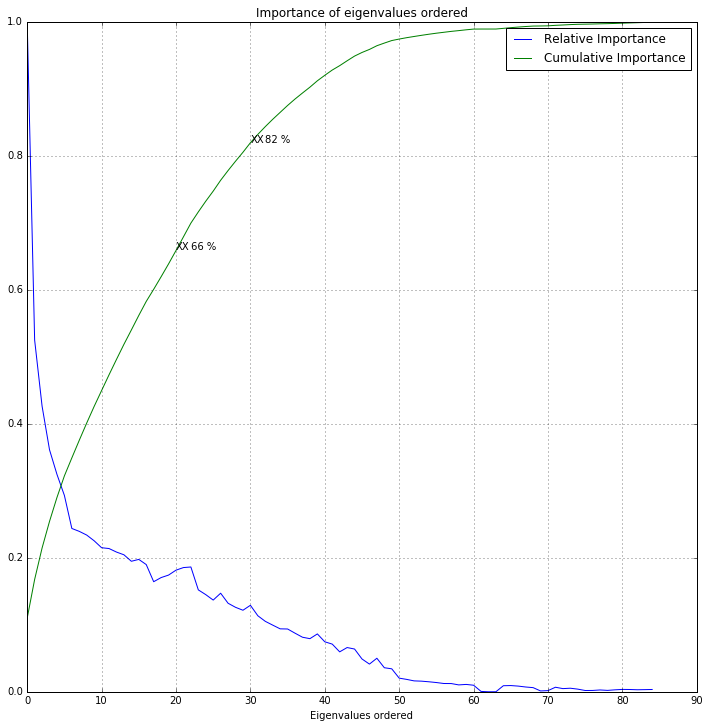

In [222]:
### Feature Engineer

# Removing the features that do not make a significant contribution.
# Covariance matrix
covmat = XX.T.dot(XX)
covmat.shape

# Eigenvalues
from scipy import linalg
evs, evmat = linalg.eig(covmat)
evs = evs.astype(float)

evs = evs/ (len(evs)**2)

fig, ax = plt.subplots(figsize = (12,12)  )

plt.plot(evs/max(evs), label="Relative Importance")
plt.title("Importance of eigenvalues ordered")
plt.xlabel("Eigenvalues ordered")
plt.plot(np.cumsum(evs)/ max(np.cumsum(evs)), label="Cumulative Importance")
plt.grid()
plt.legend(loc='Best')

plt.annotate("66 %", (22, 0.66))
plt.annotate("XX", (20, 0.66))
plt.annotate("82 %", (32, 0.82))
plt.annotate("XX", (30, 0.82))

In [223]:
### Now 80% of the variance is controlled by 30 variables.
### Hence first attempt is to n_components

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [295]:
pca = PCA(n_components=30,whiten=False)
X_r = pca.fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split( X_r, y, test_size=test_size, random_state=seed)

knn = KNeighborsClassifier()
parameters = {'n_neighbors': [2] }
#cv = {'cv': [1,2,5,10] }
knn_clf = GridSearchCV(knn, parameters, cv=2,scoring='roc_auc')
knn_clf.fit(X_train, y_train)
best_clf = knn_clf.best_estimator_
#print (best_clf)
#knn_y_hat = knn_clf.predict_proba(X_test)
print (knn_clf.grid_scores_)
print (knn_clf.best_params_)
print (knn_clf.best_score_)

y_hat = best_clf.predict(X_test)
ycm = confusion_matrix(y_hat,y_test)
print( accuracy_score(y_hat,y_test))
print( confusion_matrix(y_hat,y_test))
print( classification_report(y_hat,y_test))

[mean: 0.53317, std: 0.00323, params: {'n_neighbors': 2}]
{'n_neighbors': 2}
0.533173729957
0.94074710176
[[2190  130]
 [   8    1]]
             precision    recall  f1-score   support

          0       1.00      0.94      0.97      2320
          1       0.01      0.11      0.01         9

avg / total       0.99      0.94      0.97      2329



In [294]:
pca = PCA(n_components=30,whiten=True)
X_r = pca.fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split( X_r, y, test_size=test_size, random_state=seed)

knn = KNeighborsClassifier()
parameters = {'n_neighbors': [2] }
#cv = {'cv': [1,2,5,10] }
knn_clf = GridSearchCV(knn, parameters, cv=2,scoring='roc_auc')
knn_clf.fit(X_train, y_train)
best_clf = knn_clf.best_estimator_
#print (best_clf)
#knn_y_hat = knn_clf.predict_proba(X_test)
print (knn_clf.grid_scores_)
print (knn_clf.best_params_)
print (knn_clf.best_score_)

y_hat = best_clf.predict(X_test)
ycm = confusion_matrix(y_hat,y_test)
print( accuracy_score(y_hat,y_test))
print( confusion_matrix(y_hat,y_test))
print( classification_report(y_hat,y_test))

[mean: 0.52921, std: 0.00384, params: {'n_neighbors': 2}]
{'n_neighbors': 2}
0.529208643377
0.939888364105
[[2187  129]
 [  11    2]]
             precision    recall  f1-score   support

          0       0.99      0.94      0.97      2316
          1       0.02      0.15      0.03        13

avg / total       0.99      0.94      0.96      2329



### Setting whiten to True improves the result marginally

### Using LDA:

In [296]:
lda = LinearDiscriminantAnalysis(n_components=30)
X_r2 = lda.fit(X, y).transform(X)

X_train, X_test, y_train, y_test = train_test_split( X_r2, y, test_size=test_size, random_state=seed)

knn = KNeighborsClassifier()
parameters = {'n_neighbors': [2] }
#cv = {'cv': [1,2,5,10] }
knn_clf = GridSearchCV(knn, parameters, cv=2,scoring='roc_auc')
knn_clf.fit(X_train, y_train)
best_clf = knn_clf.best_estimator_
#print (best_clf)
#knn_y_hat = knn_clf.predict_proba(X_test)
print (knn_clf.grid_scores_)
print (knn_clf.best_params_)
print (knn_clf.best_score_)

y_hat = best_clf.predict(X_test)
print( accuracy_score(y_hat,y_test))
print( confusion_matrix(y_hat,y_test))
print( classification_report(y_hat,y_test))

[mean: 0.58541, std: 0.00377, params: {'n_neighbors': 2}]
{'n_neighbors': 2}
0.585405975506
0.935165306999
[[2177  130]
 [  21    1]]
             precision    recall  f1-score   support

          0       0.99      0.94      0.97      2307
          1       0.01      0.05      0.01        22

avg / total       0.98      0.94      0.96      2329



### Using LDA with a function:

In [301]:
def lr_report(X_train, X_test, y_train, y_test):
    
    
    parameters = {'C': [0.00001, 0.001, 0.01,0.1, 0.5, 1]}
    
    lr = LogisticRegression()
    lr_roc_clf = GridSearchCV(lr, parameters, cv=5, scoring='roc_auc')
    lr_roc_clf.fit(X_train,y_train)
    best_clf = lr_roc_clf.best_estimator_
    #print (best_clf)
    #print (lr_roc_clf.grid_scores_)
    #print (lr_roc_clf.best_params_)
    #print (lr_roc_clf.best_score_)

    y_hat = best_clf.predict(X_test)
    ycm = confusion_matrix(y_hat,y_test)
    #print( accuracy_score(y_hat,y_test))
    #print( confusion_matrix(y_hat,y_test))
    #print( classification_report(y_hat,y_test))
    tp = ycm[1,1]
    return tp

acc =[]    
for i in np.arange(1,86,1):
    lda = LinearDiscriminantAnalysis(n_components=i,)
    #print (lda.get_params)
    X_r2 = lda.fit(X, y).transform(X)
    X_train, X_test, y_train, y_test = train_test_split( X_r2, y, test_size=test_size, random_state=seed)
    tp = lr_report(X_train, X_test, y_train, y_test)  
    acc.append(tp)
    
print(acc)  


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### It is very odd that despite changing n_components for LDA from 1 to 86, the number of true positives is unchanged.

### QDA

In [313]:
X_train, X_test, y_train, y_test = train_test_split( X_r2, y, test_size=test_size, random_state=seed)
qda = QuadraticDiscriminantAnalysis()
y_hat = qda.fit(X_train, y_train, store_covariances=True).predict(X_test)
#ycm = confusion_matrix(y_hat,y_test)
    
print(y_hat) 

85


TypeError: Singleton array array(QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001), dtype=object) cannot be considered a valid collection.

### Unable to figure out QDA ...